In [158]:
from sklearn.datasets import fetch_california_housing
import pandas as pd
import numpy as np

# Load the dataset
housing = fetch_california_housing()
X = pd.DataFrame(housing.data, columns=housing.feature_names)
y = housing.target

print("Dataset shape:", X.shape)
print("Features:\n", X.head())
print("Target variable:\n", y[:5])


Dataset shape: (20640, 8)
Features:
    MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  
0    -122.23  
1    -122.22  
2    -122.24  
3    -122.25  
4    -122.25  
Target variable:
 [4.526 3.585 3.521 3.413 3.422]


In [159]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
dtypes: float64(8)
memory usage: 1.3 MB


In [160]:
X.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000


In [161]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error as MSE
from sklearn.model_selection import GridSearchCV


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=9)

In [162]:
def get_mse_value(X_train,y_train,X_test):
    classifiers = [('Decision Tree Regressor', dt), ('Gradient Boosting Regressor', gb),('Random Forest Regressor', rf)]
    mse = {}
    for name,model in classifiers:
        model.fit(X_train,y_train)
        y_pred = model.predict(X_test)
        mse[name] = MSE(y_test,y_pred)
    return mse

In [163]:
rf = RandomForestRegressor(n_estimators=25,random_state=9)

dt = DecisionTreeRegressor(max_depth=8,min_samples_leaf=0.13,random_state=3)

gb = GradientBoostingRegressor(max_depth=8,n_estimators=200,random_state=2)

get_mse_value(X_train,y_train,X_test)

{'Decision Tree Regressor': np.float64(0.7436179512233498),
 'Gradient Boosting Regressor': np.float64(0.2100886487978187),
 'Random Forest Regressor': np.float64(0.2614406935086184)}

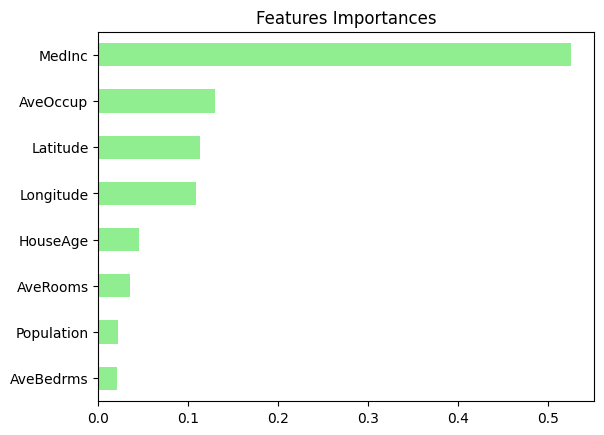

In [164]:
gb.fit(X_train,y_train)

importances = pd.Series(data=gb.feature_importances_,
                        index= X_train.columns)

# Sort importances
importances_sorted = importances.sort_values()

# Draw a horizontal barplot of importances_sorted
importances_sorted.plot(kind='barh', color='lightgreen')
plt.title('Features Importances')
plt.show()

In [165]:
X_part = X[['MedInc','AveOccup','Latitude','Longitude']]

X_train, X_test, y_train, y_test = train_test_split(X_part, y, test_size=0.2, random_state=9)

In [166]:
get_mse_value(X_train,y_train,X_test)

{'Decision Tree Regressor': np.float64(0.7486536137752874),
 'Gradient Boosting Regressor': np.float64(0.23385332154842117),
 'Random Forest Regressor': np.float64(0.26736557029295843)}

In [171]:
X_part = X[['MedInc','AveOccup']]

X_train, X_test, y_train, y_test = train_test_split(X_part, y, test_size=0.2, random_state=9)

In [172]:
get_mse_value(X_train,y_train,X_test)

{'Decision Tree Regressor': np.float64(0.7508357838982094),
 'Gradient Boosting Regressor': np.float64(0.5673235655590603),
 'Random Forest Regressor': np.float64(0.6457321816149098)}

### The best model is Gradient Boosting Regressor with accuracy 0.21